In [6]:
from baseline.baseline import *
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [10]:
# load sentiment word lists for baseline method
NEGATIVE_WORDS=read_sentiment_words_dict("baseline/data/negative_words.txt")
POSITIVE_WORDS=read_sentiment_words_dict("baseline/data/positive_words.txt")

# training data path
TRAINING_DATA_FILE="../data/training_dataset.csv"
# evaluation data path
EVALUATION_DATA_FILE="../data/evaluation_dataset.csv"
# output files
TRAINING_BASELINE_FILE="../data/training_baseline.csv"
EVALUATION_BASELINE_FILE="../data/evaluation_baseline.csv"
# labels
LABELS=["negative","positive"]

In [3]:
# load datasets
training_dataset=pd.read_csv(TRAINING_DATA_FILE,engine="python",delimiter=",")
training_tweets=training_dataset["prep_text"].apply(lambda tweet: str(tweet))
training_sentiment_targets=training_dataset["sentiment"].apply(lambda sentiment: int(sentiment))

evaluation_dataset=pd.read_csv(EVALUATION_DATA_FILE,engine="python",delimiter=",")
evaluation_tweets=evaluation_dataset["prep_text"].apply(lambda tweet: str(tweet))
evaluation_sentiment_targets=evaluation_dataset["sentiment"].apply(lambda sentiment: int(sentiment))

In [4]:
# some statistics
print(training_dataset.shape)
print(evaluation_dataset.shape)

(2169663, 3)
(199, 3)


In [8]:
# apply baseline
training_baseline=training_tweets.progress_apply(lambda tweet: apply_baseline(tweet,word_count=True))
training_estimates=training_baseline.progress_apply(lambda data_dict: data_dict["baseline"])
training_negative_count=training_baseline.progress_apply(lambda data_dict: data_dict["negative_count"])
training_positive_count=training_baseline.progress_apply(lambda data_dict: data_dict["positive_count"])

evaluation_baseline=evaluation_tweets.progress_apply(lambda tweet: apply_baseline(tweet,word_count=True))
evaluation_estimates=evaluation_baseline.progress_apply(lambda data_dict: data_dict["baseline"])
evaluation_negative_count=evaluation_baseline.progress_apply(lambda data_dict: data_dict["negative_count"])
evaluation_positive_count=evaluation_baseline.progress_apply(lambda data_dict: data_dict["positive_count"])

100%|██████████| 199/199 [00:00<00:00, 161757.07it/s]


In [9]:
# insert to dataframes
training_dataset.insert(3, "baseline", training_estimates)
training_dataset.insert(4, "positive_count", training_positive_count)
training_dataset.insert(5, "negative_count", training_negative_count)

evaluation_dataset.insert(3, "baseline", evaluation_estimates)
evaluation_dataset.insert(4, "positive_count", evaluation_positive_count)
evaluation_dataset.insert(5, "negative_count", evaluation_negative_count)

In [13]:
training_dataset.to_csv(TRAINING_BASELINE_FILE, index=False, quoting=csv.QUOTE_ALL)
evaluation_dataset.to_csv(EVALUATION_BASELINE_FILE, index=False, quoting=csv.QUOTE_ALL)

training accuracy: 55.73 %
evaluation accuracy: 68.84 %


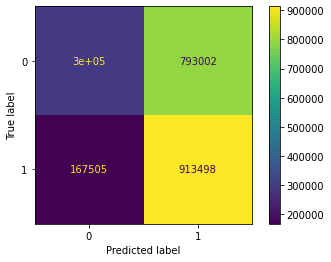

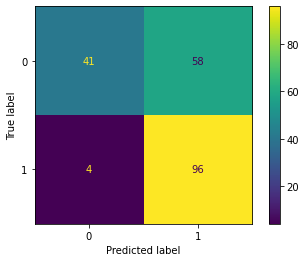

In [19]:
# calculate metric values
training_confusion_matrix=confusion_matrix(training_sentiment_targets, training_estimates)
training_accuracy=accuracy_score(training_sentiment_targets, training_estimates)
print(f"training accuracy: {round(training_accuracy*100, 2)} %")
ConfusionMatrixDisplay.from_predictions(training_sentiment_targets, training_estimates)

evaluation_confusion_matrix=confusion_matrix(evaluation_sentiment_targets, evaluation_estimates)
evaluation_accuracy=accuracy_score(evaluation_sentiment_targets, evaluation_estimates)
print(f"evaluation accuracy: {round(evaluation_accuracy*100, 2)} %")
ConfusionMatrixDisplay.from_predictions(evaluation_sentiment_targets, evaluation_estimates)